📊 BANKING RISK DNA (P-VALUES):
const            0.00000e+00
Credit_Score     0.00000e+00
DTI_Ratio        0.00000e+00
Annual_Income    8.18407e-01
Loan_Amount      0.00000e+00
dtype: object
----------------------------------------


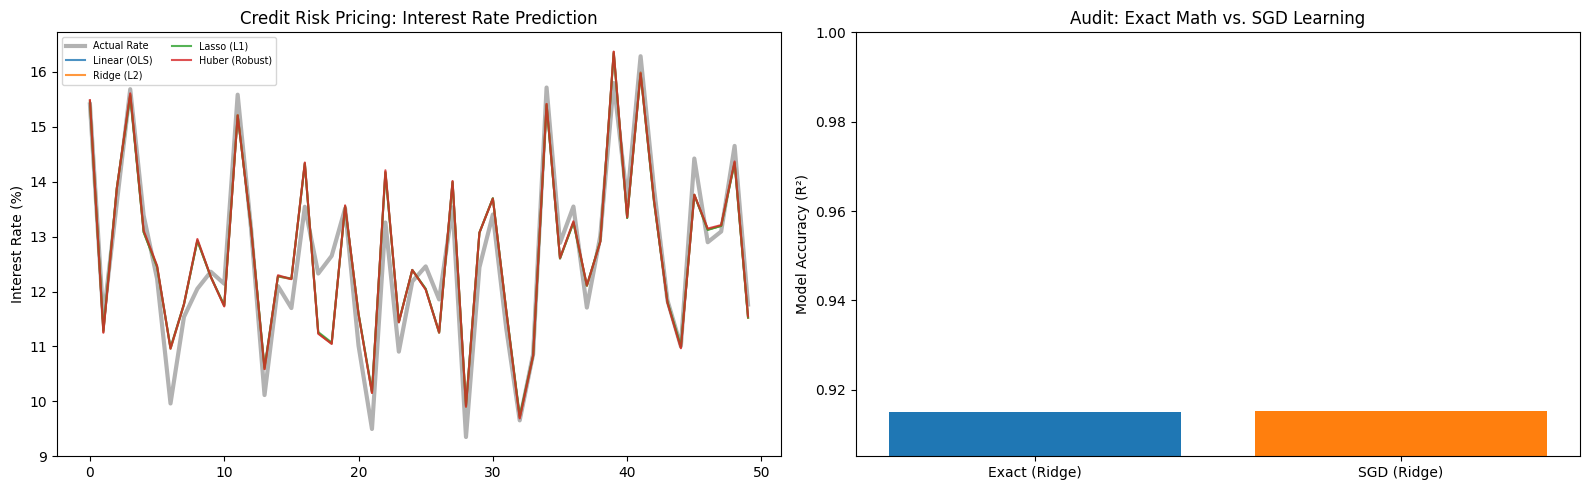


🏆 THE HONEST SCORECARD: BANKING LOAN PRICING
         Model  R² Score  RMSE (%)
  Linear (OLS)  0.915099  0.503205
    Ridge (L2)  0.915090  0.503230
Huber (Robust)  0.914841  0.503968
    Lasso (L1)  0.914785  0.504135


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# =================================================================
# 1. DATA ACQUISITION: Credit Risk Simulation
# =================================================================
# Features: Credit Score (300-850), Debt-to-Income Ratio, Annual Income, Loan Amount
np.random.seed(42)
n_borrowers = 2000

credit_score = np.random.randint(580, 850, n_borrowers)
dti_ratio = np.random.uniform(10, 50, n_borrowers)  # Debt to Income %
annual_inc = np.random.normal(75000, 20000, n_borrowers)
loan_amt = np.random.randint(5000, 40000, n_borrowers)

# Target: Interest Rate (Base 5% + risk adjustments)
# Interest rate drops as Credit Score rises, and rises as DTI/Risk rises.
interest_rate = 15.0 - (credit_score / 100) + (dti_ratio / 10) + (loan_amt / 10000) + np.random.normal(0, 0.5, n_borrowers)

df = pd.DataFrame({
    'Credit_Score': credit_score, 'DTI_Ratio': dti_ratio,
    'Annual_Income': annual_inc, 'Loan_Amount': loan_amt,
    'Interest_Rate': interest_rate
})

X = df[['Credit_Score', 'DTI_Ratio', 'Annual_Income', 'Loan_Amount']]
y = df['Interest_Rate']

# =================================================================
# 2. TESTING & VALIDATION (Mirroring Cell 9)
# =================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =================================================================
# 3. STATISTICAL DNA (Mirroring Cell 16)
# =================================================================
X_stat = sm.add_constant(X_train)
ols_stat = sm.OLS(y_train, X_stat).fit()
print("📊 BANKING RISK DNA (P-VALUES):")
print(ols_stat.pvalues.apply(lambda x: f"{x:.5e}")) # Force scientific notation for clarity
print("-" * 40)

# =================================================================
# 4. MULTI-MODEL SHOWDOWN (Cells 2-6, 12)
# =================================================================
exact_models = {
    "Linear (OLS)": LinearRegression(),
    "Ridge (L2)": Ridge(alpha=0.5),
    "Lasso (L1)": Lasso(alpha=0.01),
    "Huber (Robust)": HuberRegressor(max_iter=1000)
}

scorecard = []
plt.figure(figsize=(16, 5))

# Plotting: Actual vs Predicted Interest Rates
plt.subplot(1, 2, 1)
plt.plot(y_test.values[:50], label="Actual Rate", color='black', linewidth=3, alpha=0.3)

for name, model in exact_models.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('reg', model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    scorecard.append({
        "Model": name,
        "R² Score": r2_score(y_test, preds),
        "RMSE (%)": np.sqrt(mean_squared_error(y_test, preds))
    })
    plt.plot(preds[:50], label=name, alpha=0.8)

plt.title("Credit Risk Pricing: Interest Rate Prediction")
plt.legend(fontsize='x-small', ncol=2)
plt.ylabel("Interest Rate (%)")

# =================================================================
# 5. THE ENGINEERING AUDIT: EXACT VS SGD (Cell 15)
# =================================================================
scaler = StandardScaler()
X_tr_s = scaler.fit_transform(X_train)
X_ts_s = scaler.transform(X_test)

sgd_m = SGDRegressor(penalty='l2', max_iter=5000).fit(X_tr_s, y_train)
exact_m = Ridge(alpha=0.01).fit(X_tr_s, y_train)

sgd_r2 = r2_score(y_test, sgd_m.predict(X_ts_s))
exact_r2 = r2_score(y_test, exact_m.predict(X_ts_s))

# =================================================================
# 6. VISUALIZING THE OPTIMIZATION AUDIT
# =================================================================
plt.subplot(1, 2, 2)
plt.bar(['Exact (Ridge)', 'SGD (Ridge)'], [exact_r2, sgd_r2], color=['#1f77b4', '#ff7f0e'])
plt.ylim(min(exact_r2, sgd_r2) - 0.01, 1.0)
plt.title("Audit: Exact Math vs. SGD Learning")
plt.ylabel("Model Accuracy (R²)")

plt.tight_layout()
plt.show()

# =================================================================
# FINAL SCORECARD
# =================================================================
print("\n🏆 THE HONEST SCORECARD: BANKING LOAN PRICING")
print("=" * 60)
df_scorecard = pd.DataFrame(scorecard).sort_values(by="R² Score", ascending=False)
print(df_scorecard.to_string(index=False))
print("=" * 60)